Nama : Aisyah Dliya Ramadhanti

NIM : 1301201154

Kelas : IF4406


In [ ]:
!gdown --id 1XYpuw0tKtS_cqWJMCpQysKc-1jD6JlKa

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XYpuw0tKtS_cqWJMCpQysKc-1jD6JlKa
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 12.6MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### DATA UNDERSTANDING

In [ ]:
1#Membaca data
df = pd.read_csv('Country-data.csv', sep = ",")
df.shape

(167, 10)

In [ ]:
#Memberikan informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
#Mengetahui nilai statistik dari dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
#Menampilkan jumlah baris data yang memiliki nilai berbeda
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [ ]:
#Menampilkan 5 data pertama dari dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### DATA PREPARATION

In [ ]:
#Menghapus atribut country karena nilainya selalu unique
df = df.drop(columns = ['country'], axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#Melihat persen missing value dari setiap kolom data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
child_mort,0,0.0
exports,0,0.0
health,0,0.0
imports,0,0.0
income,0,0.0
inflation,0,0.0
life_expec,0,0.0
total_fer,0,0.0
gdpp,0,0.0


In [ ]:
#Melihat jumlah data yang duplikat
df.duplicated().sum()

0

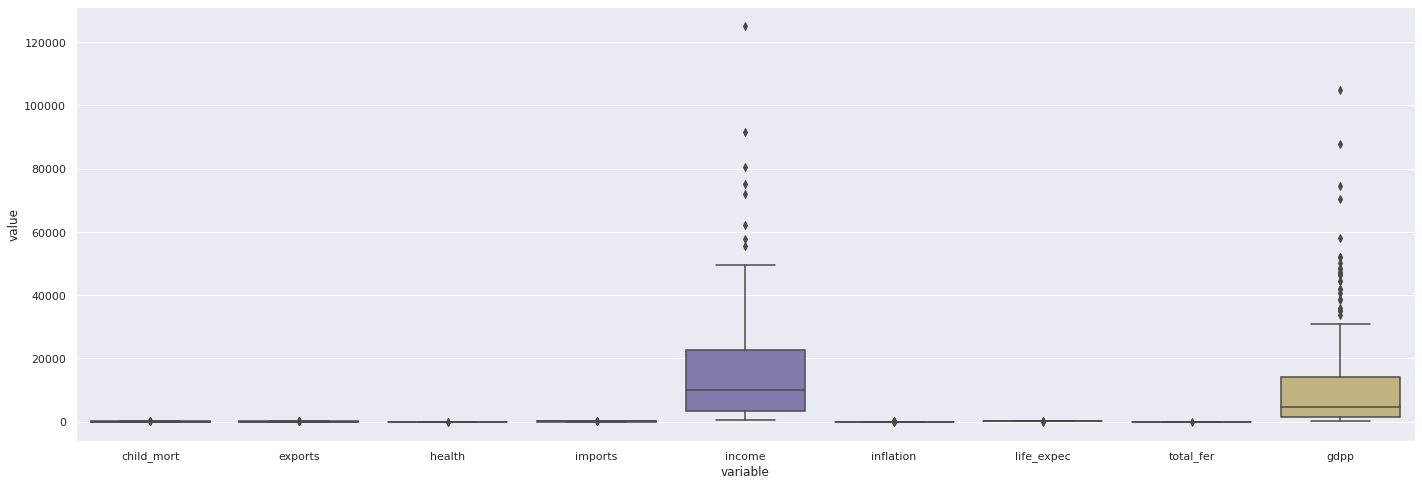

In [ ]:
#Melihat outlier di setiap atribut menggunakan boxplot

def boxplot(df):
    sns.set(rc={'figure.figsize':(24,8)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    plt.show()

boxplot(df)

In [ ]:
#Handling outlier dengan metode IQR

def handling_outliers(df):
    for x in df.columns:
      Q1 = df[x].quantile(0.25)
      Q3 = df[x].quantile(0.75)
      IQR = Q3-Q1

      Smallest = Q1 - (IQR *1.5)
      Biggest = Q3 + (IQR * 1.5)

      df.loc[df[x] > Biggest , x] = Biggest
      df.loc[df[x] < Smallest , x] = Smallest

handling_outliers(df)


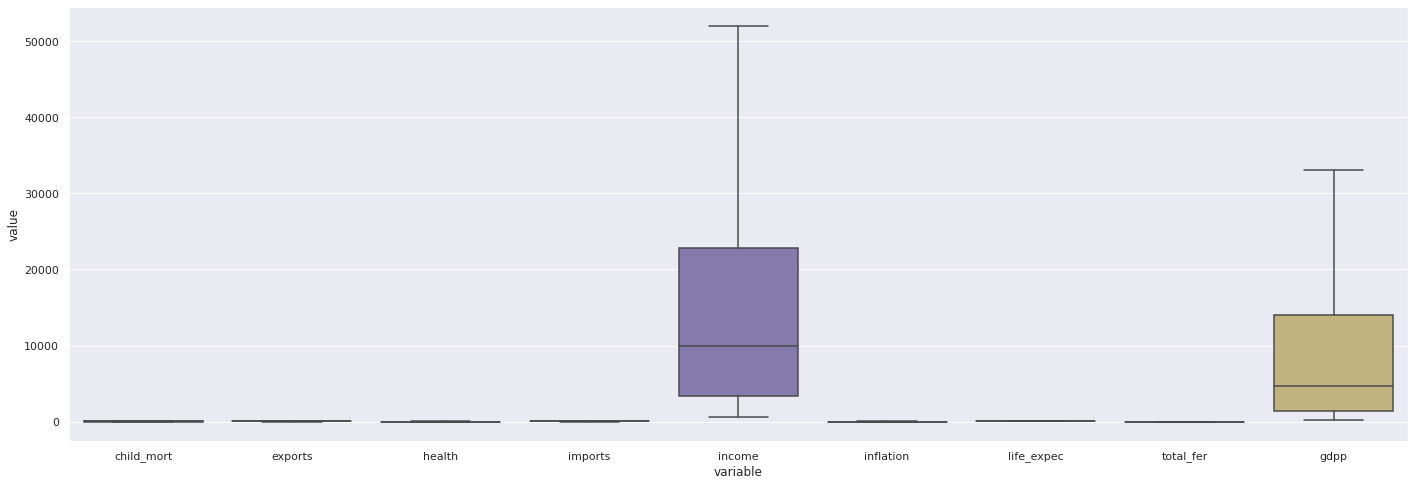

In [ ]:
#Melihat outlier pada boxplot kembali setelah dilakukan metode IQR

boxplot(df)

Melakukan normalisasi data menggunakan MinMaxScaler agar data menjadi normal (tidak ada value yang terlalu kecil atau terlalu besar)

In [ ]:
#Normalisasi data dengan MinMaxScaler
data_scale = MinMaxScaler().fit_transform(df)
data_scale[:5]


array([[0.62448761, 0.10685349, 0.46872461, 0.44167567, 0.01949044,
        0.48114205, 0.23453237, 0.79726846, 0.00978753],
       [0.09980396, 0.30130934, 0.3850528 , 0.47812561, 0.18148895,
        0.30666197, 0.81294964, 0.08536065, 0.1172984 ],
       [0.17608269, 0.4136616 , 0.19171405, 0.30868267, 0.23931774,
        0.71589707, 0.81870504, 0.29705506, 0.12854494],
       [0.82979861, 0.67185576, 0.08448416, 0.42197301, 0.10302092,
        0.93796264, 0.34676259, 0.8553137 , 0.1002766 ],
       [0.05489218, 0.49036363, 0.34281072, 0.57959434, 0.36003777,
        0.19915404, 0.82733813, 0.16730687, 0.36381045]])

In [ ]:
#Membuat dataframe dari data hasil
df_scale = pd.DataFrame(data_scale, columns=df.columns)
df_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810


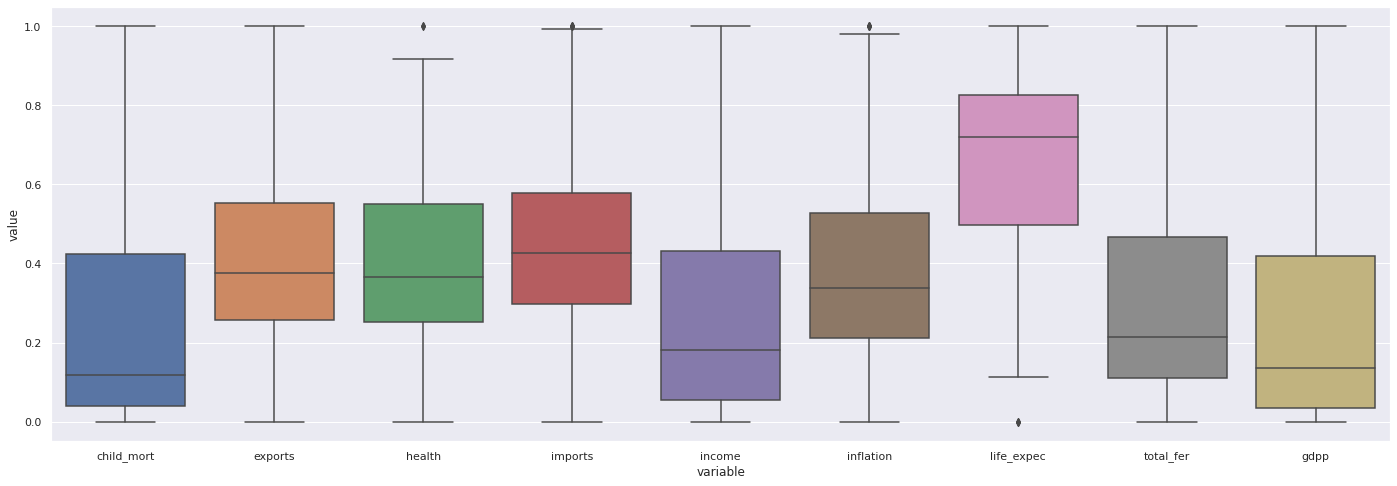

In [ ]:
#Melihat boxplot dari data yang sudah dinormalisasi
boxplot(df_scale)

In [ ]:
handling_outliers(df_scale)

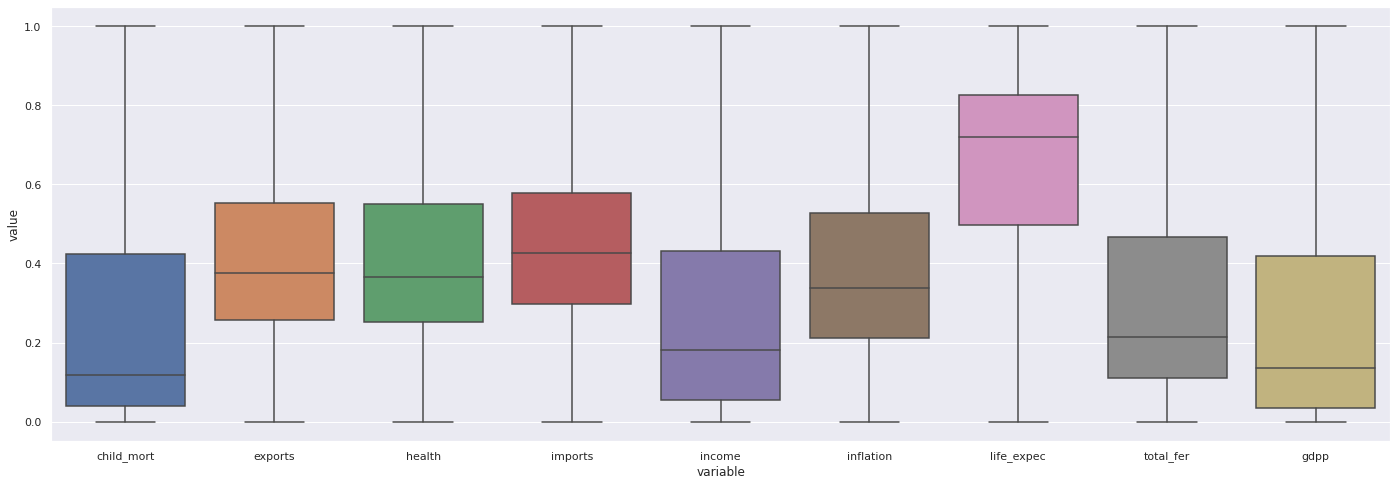

In [ ]:
boxplot(df_scale)

Melihat korelasi dataset dengan heatmap

<ipython-input-24-270bd15ddbbc>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


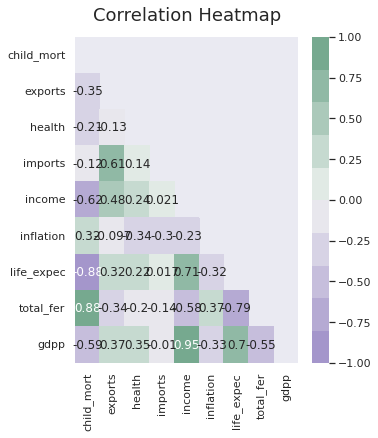

In [ ]:
map = sns.diverging_palette(275,150,  s=45, l=65, n=10)
corr = df.corr()
plt.subplots(figsize=(5,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap=map)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Melihat distribusi data dari semua atribut

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

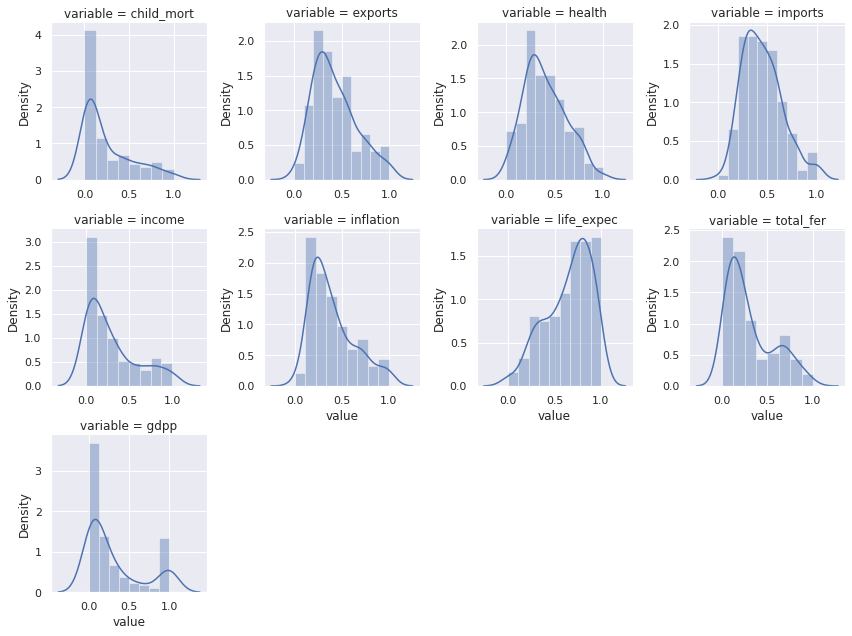

In [ ]:
f = pd.melt(df_scale, value_vars=df_scale.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Menggunakan WCSS untuk melihat SSE di tiap cluster

In [ ]:
#Melihat SSE pada setiap cluster
sse =[]
index = range(1,11)
for i in index:
  kmeans = KMeans(n_clusters=i, random_state=30)
  kmeans.fit(df_scale)
  sse_ = kmeans.inertia_
  sse.append(sse_)
  print(i, sse_)

1 101.17904506458522
2 60.55209880461772
3 42.12519565000679
4 37.388100788459475
5 34.754886429360006
6 31.129257113611242
7 28.798680038427396
8 26.206703439801142
9 24.365887039341793
10 22.488856971001816


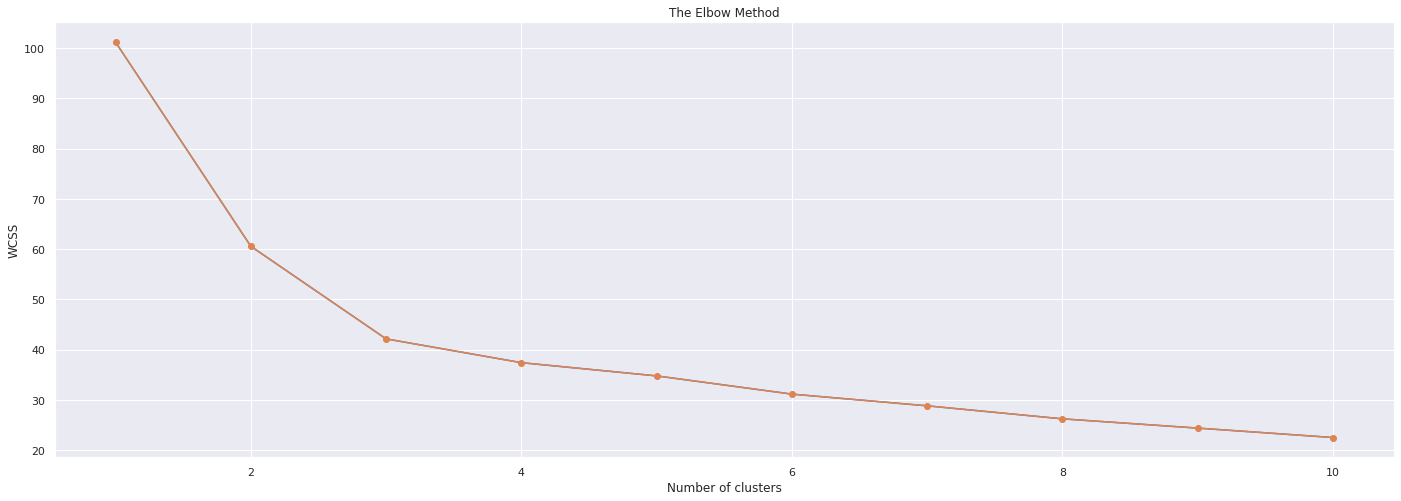

In [ ]:
#Melihat grafik elbow
plt.plot(index, sse)
plt.plot(index,sse,marker='o')
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

REDUKSI DIMENSI

In [ ]:
#Melakukan Feature Reduction dengan PCA ke 3D
pca = PCA(n_components=2)
components = pca.fit_transform(df_scale)
hasil_pca = pd.DataFrame(data=components,
                        columns=['component 1', 'component 2'])

hasil_pca.head()

,component 1,component 2
0,-0.828750,-0.239834
1,0.030136,0.255057
2,-0.118539,-0.001744
3,-0.820331,-0.275233
4,0.293014,0.227075


In [ ]:
#Menampilkan variance dari dataset yang telah direduksi
pca.explained_variance_

array([0.34735201, 0.07425574])

In [ ]:
#Menampilkan rasio variance dari dataset yang telah direduksi
pca.explained_variance_ratio_

array([0.56988513, 0.12182811])

Hasil di atas menunjukan 56.99% variansi data dijelaskan oleh komponen 1, dan 12,18% dijelaskan oleh komponen 2

ALGORITMA CLUSTERING

In [ ]:
class KMeans() :
    def __init__(self, k, max_iter, verbose=False) :
        self.k = k
        self.max_iter = max_iter
        self.verbose = verbose

    #Menentukan nilai centroid awal (random)
    def _init_centroids(self, X) :
        n = len(X)
        init_idx = np.random.randint(0, n, self.k)
        centroid = X[init_idx]

        return centroid

    #Menentukan jarak euclidean
    def euclidean(self, x1, x2) :
        return np.sqrt(np.sum((x2-x1)**2, axis=1))

    def fit_predict(self, X) :
        X = X.to_numpy()
        n_data = X.shape[0]
        #Menentukan nilai centroid secara random
        centroids = self._init_centroids(X)
        labels = np.full(n_data, -1)

        for iteration in range(self.max_iter):
            #Menampung nilai data point pada setiap iterasi
            clusters = [[] for i in range(self.k)]
            #Menampung nilai centroid lama
            old_centroid = np.copy(centroids)

            #Menampung nilai total jarak antara tiap titik dengan centroid terdekatnya
            inertia = 0

            for i, data_point in enumerate(X) :
                #Menghitung jarak data point ke centroid menggunakan euclidean
                dist = self.euclidean(data_point, centroids)
                #Mengambil cluster yang memiliki nilai jarak euclidean paling minimum
                cluster = np.argmin(dist)
                #Mengupdate nilai inertia
                inertia += dist[cluster]**2
                #Memasukkan nilai data point ke dalam array clusters
                clusters[cluster].append(data_point)
                #Memasukkan nilai cluster setiap data ke array labels
                labels[i] = cluster

            for i in range(self.k) :
                centroids[i] = np.mean(np.array(clusters[i]), axis=0)

            if self.verbose:
                print(f" Iteration {iteration+1}, inertia {inertia}")

            #Proses iterasi akan berhenti jika sudah tidak terjadi lagi perpindahan kelompok pada data
            isSame = old_centroid == centroids
            if isSame.all() :
                break

        self.labels = labels
        self.clusters = clusters
        self.inertia = inertia

        return labels, clusters


PROSES CLUSTERING

In [ ]:
#Melihat nilai inersia dengan jumlah cluster = 2
kmeans = KMeans(k=2, max_iter=50,verbose=True)
labels, cluster = kmeans.fit_predict(df_scale)
centroids = np.array(cluster)
df['class'] = labels; hasil_pca['class'] = labels

 Iteration 1, inertia 92.69145923261767
 Iteration 2, inertia 61.91833737758787
 Iteration 3, inertia 61.401788107541066
 Iteration 4, inertia 60.91579063322411
 Iteration 5, inertia 60.78641063359638
 Iteration 6, inertia 60.70054877574548


<ipython-input-32-b2921c6d8387>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  centroids = np.array(cluster)


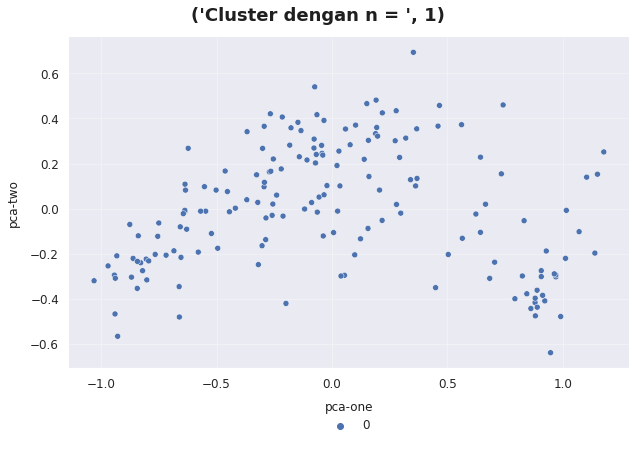

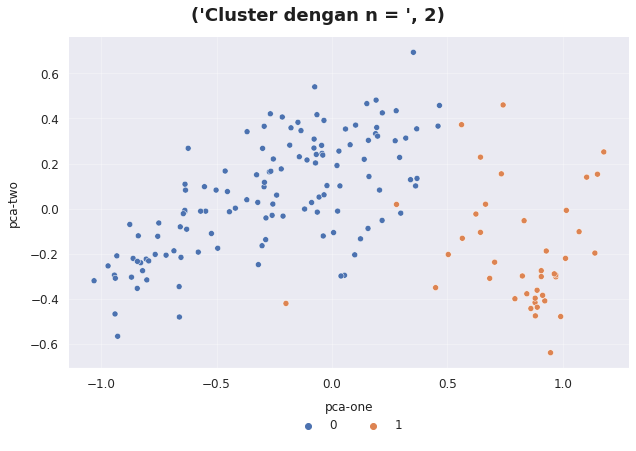

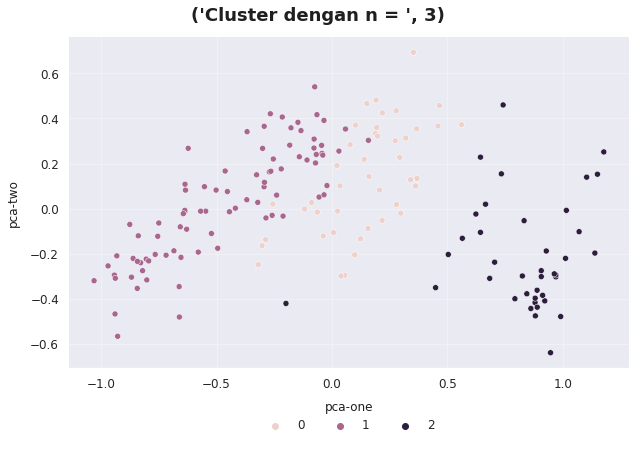

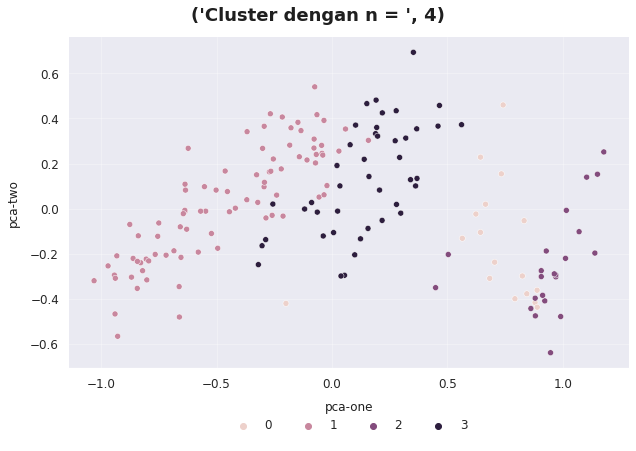

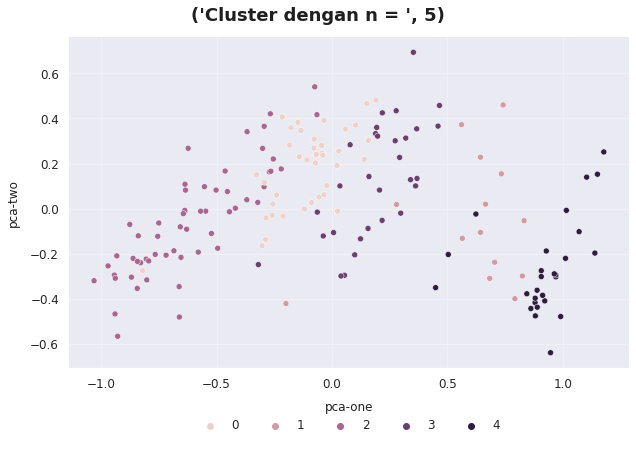

In [ ]:
for i in range(1,6):
    kmeans = KMeans(k=i,max_iter=100,verbose=False)
    test, clusters = kmeans.fit_predict(df)
    df["result"] = test
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df.drop("result", axis=1))

    fig, ax = plt.subplots(figsize=(9, 6))

    sns.scatterplot(x=hasil_pca['component 1'], y=hasil_pca['component 2'], hue=test)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
    ax.grid(alpha=0.3)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=12)
    ax.set_xlabel("pca-one", fontsize=12, labelpad=10, color="#1F1F1F")
    ax.set_ylabel("pca-two", fontsize=12, labelpad=10, color="#1F1F1F")

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    print("")

    plt.suptitle(("Cluster dengan n = ", i), ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold', color="#1F1F1F")
    plt.tight_layout()
    plt.savefig("kmeans-pca")
    plt.show()

### DATAFRAME HASIL AKHIR

In [ ]:
hasil_pca['cluster'] = labels
hasil_pca

,component 1,component 2,class,cluster
0,-0.828750,-0.239834,1,1
1,0.030136,0.255057,1,1
2,-0.118539,-0.001744,1,1
3,-0.820331,-0.275233,1,1
4,0.293014,0.227075,0,0
...,...,...,...,...
162,-0.300509,0.267135,1,1
163,0.039113,-0.298633,1,1
164,-0.074712,0.539817,1,1
165,-0.579052,-0.192691,1,1
